<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/VLF_plot_and__cache_narrow_amplitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Files and Narrowband Amplitude Plot

* Get files from both GoogleDrive & DropBox
* Generate Narrowband Amplitude Plot
* Cache Plot
* Retrieve Plot from Cache




In [2]:
!pip install "pymongo[srv]"
#
# restart after!
#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 4.1 MB/s 


In [3]:
!pip install dropbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 4.2 MB/s 
     |████████████████████████████████| 162 kB 49.7 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# %matplotlib nbagg
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import scipy.signal as sg
import numpy as np
import pandas as pd
import datetime as dt
import os
# from Tkinter import Tk
# from tkFileDialog import askopenfilename
from matplotlib.pyplot import *
from matplotlib.dates import num2date, date2num, hours, DateFormatter

In [6]:
import subprocess

def exec_cmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

exec_cmd('echo "Hello, World!"', verbose = True)


Hello, World! 


# Download DropBox file

In [7]:
import dropbox

In [8]:
access_token = 'sl.BI0W8kEorJ2D_3mD6tVDFGrY2QlOiysQuhtPh7IVCjO_n_XldQ81hJuKa8SRcxsEZJ80XAM4spvbeM4YXkf9rA8EQQFG11-IcGZxUyQDu5Sws9_YUQyQP9KY-6u8rJbXc1v0H4c' # Get your access token from https://www.dropbox.com/developers/apps
dbx = dropbox.Dropbox(access_token)
print('Connected to Dropbox')



Connected to Dropbox


In [9]:
for entry in dbx.files_list_folder('/VLF/data/Narrowband').entries:
  print(entry.name)

France
Valdez


In [10]:
file_dbx = '/VLF/data/narrowband/france/2011_05_26/nn110526000000dho_100b.mat'

dbx.files_download_to_file('/content/' + file_dbx.split('/')[-1] ,file_dbx)

FileMetadata(client_modified=datetime.datetime(2022, 6, 2, 14, 51, 26), content_hash='c27ef15d52f4473ad57575c9e6775df18add2bb941b00e7566d31b1dfb1f8950', export_info=NOT_SET, file_lock_info=NOT_SET, has_explicit_shared_members=NOT_SET, id='id:VXyzJu2IVLAAAAAAAAAASA', is_downloadable=True, media_info=NOT_SET, name='NN110526000000DHO_100B.mat', parent_shared_folder_id=NOT_SET, path_display='/VLF/data/Narrowband/France/2011_05_26/NN110526000000DHO_100B.mat', path_lower='/vlf/data/narrowband/france/2011_05_26/nn110526000000dho_100b.mat', preview_url=NOT_SET, property_groups=NOT_SET, rev='015e07823ef7e0100000001d7bee3e0', server_modified=datetime.datetime(2022, 6, 2, 14, 51, 27), sharing_info=NOT_SET, size=369270, symlink_info=NOT_SET)

# Download GoogleDrive 

In [11]:
file_goo = '/content/drive/MyDrive/VLF/data/Narrowband/SouthPole/2011_11_30/SP111130000000NLK_100C.mat'

import shutil
shutil.copyfile(file_goo, '/content/' + file_goo.split('/')[-1])


'/content/SP111130000000NLK_100C.mat'

# Plot Amplitude

## Small check

In [12]:
import os
mat_files = [ x for x in os.listdir('/content') if '.mat' in x ]
mat_files

['SP111130000000NLK_100C.mat', 'nn110526000000dho_100b.mat']

dict_keys(['start_year', 'start_month', 'start_day', 'start_hour', 'start_minute', 'start_second', 'latitude', 'longitude', 'altitude', 'Fs', 'gps_quality', 'adc_channel_number', 'adc_sn', 'adc_type', 'antenna_bearings', 'antenna_description', 'cal_factor', 'computer_sn', 'gps_sn', 'hardware_description', 'is_broadband', 'station_description', 'station_name', 'VERSION', 'is_amp', 'is_msk', 'Fc', 'call_sign', 'filter_taps', 'data'])


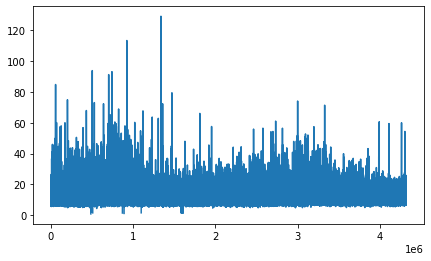

In [13]:
data = sio.loadmat(mat_files[0])

print(data.keys())

rcParams['figure.figsize']=7,4
plt.plot(data['data'])
plt.show()

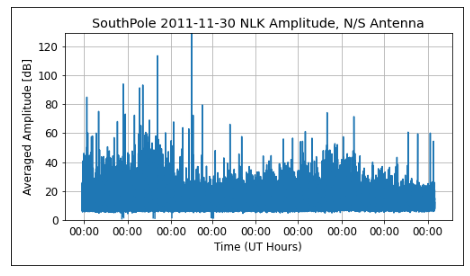

In [14]:
def plot_is_cached(fname,type_signal='Narrowband'):

  import os
  path_cache = '/content/drive/MyDrive/VLF/plot_cache/' + type_signal + '/'
  png_files = [ x for x in os.listdir(path_cache) if '.png' in x ]
  if fname.split('.mat')[0]+'.png' in png_files:
    return True
  else:
    return False

def plot_cached(fname,type_signal='Narrowband'):
  
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  %matplotlib inline
  import os
  path_cache = '/content/drive/MyDrive/VLF/plot_cache/' + type_signal + '/'

  rcParams['figure.figsize'] = 7,4
  rcParams['figure.autolayout'] = True
  rcParams['font.size'] = 12
  
  img = mpimg.imread(path_cache + fname.split('.mat')[0] + '.png')

  plt.xticks([])
  plt.yticks([])
  imgplot = plt.imshow(img)
  plt.show()

if plot_is_cached(mat_files[0]):
  plot_cached(mat_files[0])

In [15]:
def plot_amplitude(mat_contents0,fname,save=True,replace=False):

  if not replace and plot_is_cached(fname):
    plot_cached(fname,type_signal='Narrowband')
    print('Warning: plot cached')
    return 

  rcParams['figure.figsize'] = 7,4
  rcParams['figure.autolayout'] = True
  rcParams['font.size'] = 12

  channel_sampling_freq0 = mat_contents0['Fs']
  data_amp               = mat_contents0['data']
  callsign0              = fname[14:17]
  adc_channel0           = mat_contents0['adc_channel_number']
  start_day0             = mat_contents0['start_day']
  start_hour0            = mat_contents0['start_hour']
  start_minute0          = mat_contents0['start_minute']
  start_month0           = mat_contents0['start_month']
  start_second0          = mat_contents0['start_second']
  start_year0            = mat_contents0['start_year']
  station_name0          = mat_contents0['station_name']
  startdate0             = dt.datetime(start_year0,start_month0,start_day0,start_hour0,start_minute0,start_second0)
  time0                  = pd.date_range(str(startdate0), periods=len(data_amp),
                                        freq=str(channel_sampling_freq0)[2:3]+' s')

  figure, (ax0)=subplots(1)    #, sharex=True, sharey=False)
  ax0.plot(time0, mat_contents0['data'])
  ax0.set_ylabel('Averaged Amplitude [dB]')
  ax0.set_xlabel('Time (UT Hours)')
  ax0.xaxis.set_major_formatter(DateFormatter('%H:%M'))
  ax0.set_ylim(0,np.nanmax( mat_contents0['data'] ))
  ax0.grid(True)

  if adc_channel0 == 0:
      ax0.set_title(str("".join(map(chr,station_name0)))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude, N/S Antenna')
  elif adc_channel0 == 1:
      ax0.set_title(str("".join(map(chr,station_name0)))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude, E/W Antenna')
  else:
      ax0.set_title(str("".join(map(chr,station_name0)))+' '+ str(startdate0)[0:10]+' '+ str(callsign0) + ' Amplitude')
      
  plt.show()

  if save:
    figure.savefig('/content/drive/MyDrive/VLF/plot_cache/Narrowband/' + fname.split('.mat')[0] + '.png', format='png')
  
  return figure


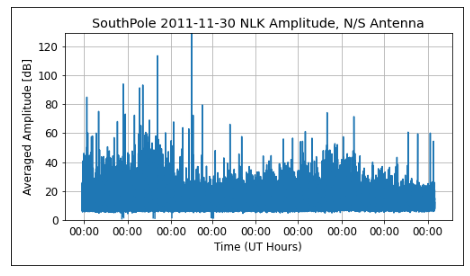

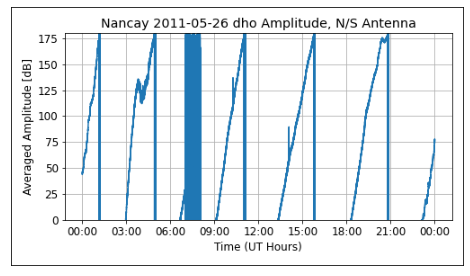

In [16]:
mat_files = [ x for x in os.listdir('/content') if '.mat' in x ]

for f in mat_files:
  data = sio.loadmat(f)
  plot_amplitude(data,f)
